# CSCI 490 Assignment 5
#### Instructor: Dr. David Koop
#### Programmer: Dominykas Karalius
#### Due at 11:59pm on April 30th, Thursday
#### Z1809478

# 1. Data Wrangling (20 pts)

In [149]:
import os
from urllib.request import urlretrieve
import pandas as pd

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/30ce7eb4b0a6a37b274f12cda350554b95609baa/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
local_fname = url[url.rfind('/')+1:]
if not os.path.exists(local_fname):
    urlretrieve(url, local_fname)
df = pd.read_csv('time_series_covid19_confirmed_US.csv')

In [150]:
df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,113,121,121,128,130,133,133,133,133,135
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,6,6,6,6,6,6,6,6,6,6
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,513,573,620,683,725,788,897,903,923,974
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,43,43,45,45,50,51,51,51,51,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,84090056.0,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0000,0.0000,...,0,0,0,0,0,0,0,0,0,0
3252,84099999.0,US,USA,840,99999.0,NaN,Grand Princess,US,0.0000,0.0000,...,103,103,103,103,103,103,103,103,103,103
3253,84070004.0,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0000,0.0000,...,0,0,0,0,0,0,0,370,429,472
3254,84070005.0,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.0000,0.0000,...,0,0,0,0,0,0,0,21,23,36


In [151]:
#Create a date_range and then convert it to string format.
rng = pd.date_range(start='1/22/20', end='4/15/20')
dates = rng.strftime('%#m/%#d/%y')

In [152]:
#Melt date rows into columns along with number of cases.
df = pd.melt(df, id_vars=["Province_State","Admin2"], value_vars=(dates), var_name="date", value_name="cases")

In [153]:
#Convert the 'date' column to datetime.
df['date']= pd.to_datetime(df['date']) 
df

,Province_State,Admin2,date,cases
0,American Samoa,NaN,2020-01-22,0
1,Guam,NaN,2020-01-22,0
2,Northern Mariana Islands,NaN,2020-01-22,0
3,Puerto Rico,NaN,2020-01-22,0
4,Virgin Islands,NaN,2020-01-22,0
...,...,...,...,...
276755,Wyoming,Unassigned,2020-04-15,0
276756,Grand Princess,NaN,2020-04-15,103
276757,Michigan,Michigan Department of Corrections (MDOC),2020-04-15,472
276758,Michigan,Federal Correctional Institution (FCI),2020-04-15,36


# 2. Spatial Roll-Up (25 pts)

First, compute the counties with the highest number of reported cases as of April 15, 2020. Recall that this will correlate with population to some degree.

In [109]:
grouped_df = df.groupby("Admin2")
maximums = grouped_df.max()
maximums.sort_values(by='cases', ascending=False)

,Province_State,date,cases
Admin2,,,
New York,New York,2020-04-15,118302
Nassau,New York,2020-04-15,26715
Suffolk,Virginia,2020-04-15,23523
Westchester,New York,2020-04-15,20947
Cook,Minnesota,2020-04-15,17306
...,...,...,...
Issaquena,Mississippi,2020-04-15,0
Schleicher,Texas,2020-04-15,0
Jim Hogg,Texas,2020-04-15,0


Second, compute the number of cases per state for each day. This is equivalent to rolling up from the county dimension to the state dimension. You should use a groupby that sums the cases across all the counties in each state.

In [116]:
grouped_df = df.groupby(['date','Province_State'])
sums = grouped_df.sum()
sums

cases
date       Province_State       
2020-01-22 Alabama             0
           Alaska              0
           American Samoa      0
           Arizona             0
           Arkansas            0
...                          ...
2020-04-15 Virginia         6500
           Washington      10942
           West Virginia     702
           Wisconsin        3721
           Wyoming           287

[4930 rows x 1 columns]

# 3. 3-Day Rolling Average (30 pts)

In [200]:
# Our goal is to have cases organized by state, then county, and finally date. Set a multi-level index to organize the data this way. 
slacker = df
slacker = slacker.set_index(['Province_State', 'Admin2', 'date'], inplace=False)
slacker

,,,cases
Province_State,Admin2,date,
American Samoa,NaN,2020-01-22,0
Guam,NaN,2020-01-22,0
Northern Mariana Islands,NaN,2020-01-22,0
Puerto Rico,NaN,2020-01-22,0
Virgin Islands,NaN,2020-01-22,0
...,...,...,...
Wyoming,Unassigned,2020-04-15,0
Grand Princess,NaN,2020-04-15,103
Michigan,Michigan Department of Corrections (MDOC),2020-04-15,472


In [201]:
#Creating a data frame where the date is the only index and the state and county are normal columns again.
slacker2 = df
slacker2 = slacker2.set_index(['date'], inplace=False)

#Then, shift the dates, and apply a groupby (on state and county).
shift = slacker2.tshift(freq = '-1D') 
grouped_df = shift.groupby(['Province_State','Admin2'])

#Compute the rolling three-day window on the groupby and compute the mean value for that window.
grouped_df.rolling(3).mean()

cases
Province_State Admin2  date             
Alabama        Autauga 2020-01-21    NaN
                       2020-01-22    NaN
                       2020-01-23    0.0
                       2020-01-24    0.0
                       2020-01-25    0.0
...                                  ...
Wyoming        Weston  2020-04-10    0.0
                       2020-04-11    0.0
                       2020-04-12    0.0
                       2020-04-13    0.0
                       2020-04-14    0.0

[276165 rows x 1 columns]

In [202]:
#Store the new average cases as a new column in the original multi-index dataframe. These will match up because the groupby creates the same index structure.
slacker['avg_cases'] = grouped_df.rolling(3).mean()
slacker

,,,cases,avg_cases
Province_State,Admin2,date,,
American Samoa,NaN,2020-01-22,0,NaN
Guam,NaN,2020-01-22,0,NaN
Northern Mariana Islands,NaN,2020-01-22,0,NaN
Puerto Rico,NaN,2020-01-22,0,NaN
Virgin Islands,NaN,2020-01-22,0,NaN
...,...,...,...,...
Wyoming,Unassigned,2020-04-15,0,NaN
Grand Princess,NaN,2020-04-15,103,NaN
Michigan,Michigan Department of Corrections (MDOC),2020-04-15,472,NaN


C:\Users\dkara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  


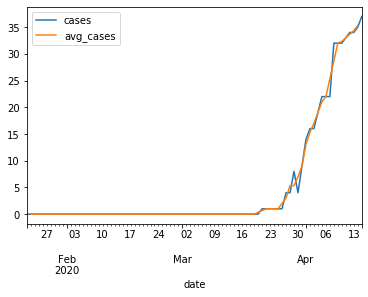

In [203]:
#Finally we will create a couple of line plots. First, create one for DeKalb County that shows the number of cases versus the average number of cases.
slacker.loc['Illinois','DeKalb'].plot.line()

In [207]:
#Next, create one for Cook County but use a log-scale for the y-axis

C:\Users\dkara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


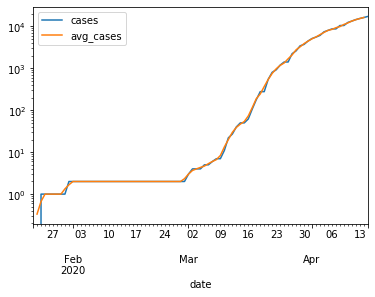

In [208]:
slacker.loc['Illinois','Cook'].plot.line(logy=True)